In [1]:
import kagglehub # type: ignore

path = kagglehub.dataset_download("mlg-ulb/creditcardfraud")

In [4]:
print(path)

C:\Users\XXX\.cache\kagglehub\datasets\mlg-ulb\creditcardfraud\versions\3


In [9]:
import pandas as pd

df = pd.read_csv(f"{path}/creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,1.168375e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,3.416908e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-1.379537e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.074095e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,9.604066e-16,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,1.487313e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-5.556467e-16,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,1.213481e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-2.406331e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


In [12]:
df['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [16]:
X = df.drop(labels=['Class'], axis=1)

In [18]:
y = df['Class'].copy()

In [22]:
y

0         0
1         0
2         0
3         0
4         0
         ..
284802    0
284803    0
284804    0
284805    0
284806    0
Name: Class, Length: 284807, dtype: int64

In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [14]:
dtc = DecisionTreeClassifier(random_state=42)

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
dtc.fit(X_train, y_train)
predicts = dtc.predict(X_test)
print(classification_report(y_test, predicts))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71089
           1       0.69      0.77      0.73       113

    accuracy                           1.00     71202
   macro avg       0.85      0.88      0.86     71202
weighted avg       1.00      1.00      1.00     71202



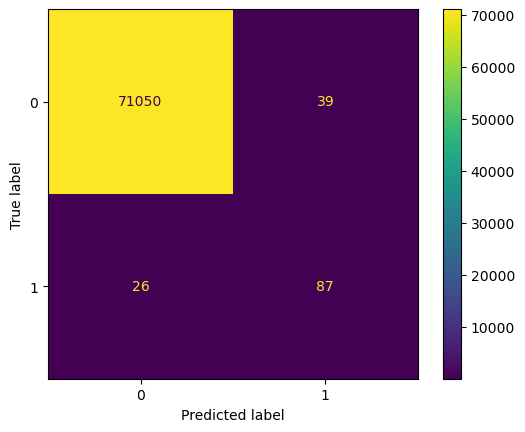

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, predicts, labels=dtc.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dtc.classes_)
disp.plot()
plt.show()

In [26]:
path = dtc.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas
ccp_alphas = ccp_alphas[:-1]

In [28]:
print(ccp_alphas)

[0.00000000e+00 4.36642861e-06 4.61060595e-06 4.63065207e-06
 4.63778566e-06 4.63798916e-06 4.64947302e-06 4.66891965e-06
 4.67013850e-06 4.67739906e-06 4.67784920e-06 4.67845659e-06
 4.67932800e-06 4.68094725e-06 4.68128679e-06 4.68137474e-06
 4.68153835e-06 4.68279332e-06 4.74611948e-06 4.88259942e-06
 6.22811353e-06 6.24205114e-06 7.49046137e-06 7.49046137e-06
 8.64284004e-06 8.69428551e-06 8.89492287e-06 8.94595185e-06
 9.01629609e-06 9.11610995e-06 9.42108373e-06 1.13825638e-05
 1.43071929e-05 1.66454697e-05 1.83107989e-05 2.04285310e-05
 2.34423698e-05 2.34468418e-05 2.40634862e-05 3.30461531e-05
 4.86879989e-05 5.20528546e-05 6.17677394e-05 8.13258228e-05
 9.90096663e-05 2.47561737e-04]


[Text(0.2525855312828256, 0.9791666666666666, 'V17 <= -2.769\ngini = 0.004\nsamples = 213605\nvalue = [213226, 379]\nclass = No HD'),
 Text(0.18403361344537816, 0.9375, 'V10 <= 2.217\ngini = 0.329\nsamples = 323\nvalue = [67, 256]\nclass = Yes HD'),
 Text(0.2183095723641019, 0.9583333333333333, 'True  '),
 Text(0.1773109243697479, 0.8958333333333334, 'V14 <= -2.793\ngini = 0.277\nsamples = 307\nvalue = [51, 256]\nclass = Yes HD'),
 Text(0.13277310924369748, 0.8541666666666666, 'V27 <= 1.697\ngini = 0.224\nsamples = 288\nvalue = [37, 251]\nclass = Yes HD'),
 Text(0.0907563025210084, 0.8125, 'V3 <= -31.459\ngini = 0.147\nsamples = 250\nvalue = [20, 230]\nclass = Yes HD'),
 Text(0.08403361344537816, 0.7708333333333334, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]\nclass = No HD'),
 Text(0.09747899159663866, 0.7708333333333334, 'V15 <= 0.933\ngini = 0.128\nsamples = 247\nvalue = [17, 230]\nclass = Yes HD'),
 Text(0.05378151260504202, 0.7291666666666666, 'V5 <= -0.051\ngini = 0.067\nsamples = 2

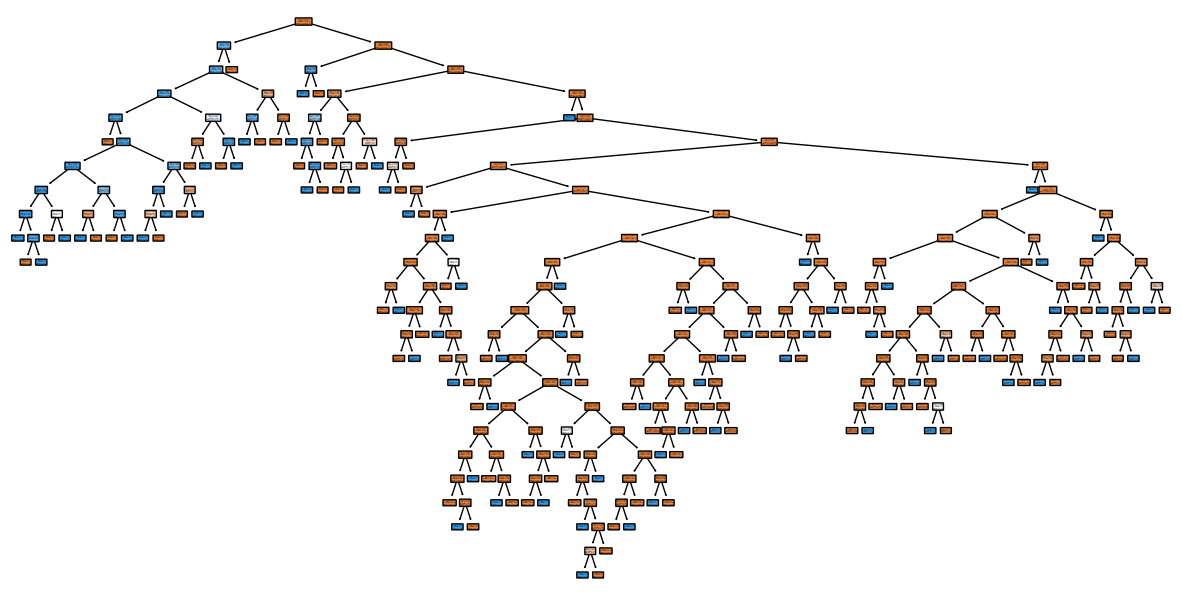

In [29]:
from sklearn.tree import plot_tree

plt.figure(figsize=(15, 7.5))
plot_tree(dtc,
          filled=True,
          rounded=True,
          class_names=["No HD", "Yes HD"],
          feature_names=X.columns)

In [82]:
clf_dts = []

for ccp_alpha in ccp_alphas:
    clf_dt = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alpha)
    clf_dt.fit(X_train, y_train)
    clf_dts.append(clf_dt)

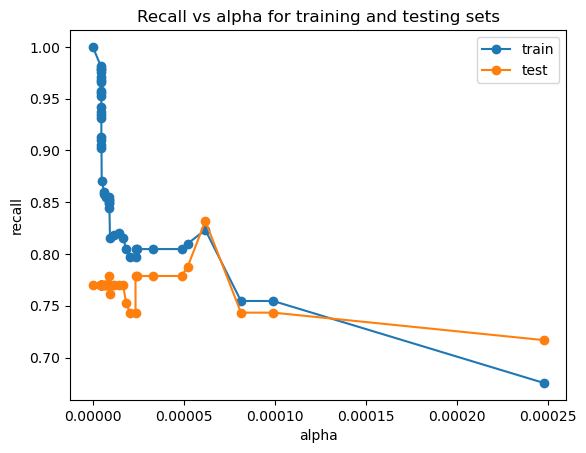

In [83]:
train_recall = []
test_recall = []

for clf_dt in clf_dts:
    predictions = clf_dt.predict(X_train)
    recall = classification_report(y_train, predictions, output_dict=True)['1']['recall']
    train_recall.append(recall)

for clf_dt in clf_dts:
    predictions = clf_dt.predict(X_test)
    recall = classification_report(y_test, predictions, output_dict=True)['1']['recall']
    test_recall.append(recall)

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_recall, marker="o", label="train")
ax.plot(ccp_alphas, test_recall, marker="o", label="test")
ax.legend()
plt.show()

In [84]:
recall_alphas = dict(zip(test_recall, ccp_alphas))
recall_alphas_max = sorted(recall_alphas.items())[-1]
best_ccp_alpha = recall_alphas_max[-1]
print(recall_alphas_max)


(0.831858407079646, 6.176773944732917e-05)


In [85]:
from sklearn.model_selection import cross_val_score

[0.78666667 0.75       0.77631579 0.73684211 0.78947368]


<Axes: xlabel='tree'>

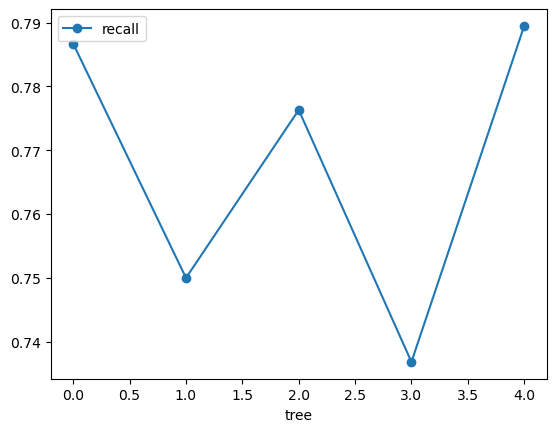

In [88]:
dtc = DecisionTreeClassifier(random_state=42, ccp_alpha=best_ccp_alpha)

scores = cross_val_score(dtc, X_train, y_train, cv=5, scoring='recall')
print(scores)
df = pd.DataFrame(data={'tree': range(5), 'recall': scores})

df.plot(x='tree', y='recall', marker='o')

In [ ]:
print(ccp_alphas)

In [ ]:
alpha_loop_values = []

for ccp_alpha in ccp_alphas:
    clf_dt = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alpha)
    recall = cross_val_score(dtc, X_train, y_train, cv=5, scoring='recall')
    alpha_loop_values.append([ccp_alpha, recall])

alpha_results = pd.DataFrame(alpha_loop_values, columns=['alpha', 'recall'])

alpha_results.plot(x='alpha',
                   y='mean_recall',
                   marker='o')

KeyError: 'mean_recall'

In [92]:
alpha_results.head()

,alpha,recall
0,0.000000,"[0.7866666666666666, 0.75, 0.7763157894736842,..."
1,0.000004,"[0.7866666666666666, 0.75, 0.7763157894736842,..."
2,0.000005,"[0.7866666666666666, 0.75, 0.7763157894736842,..."
3,0.000005,"[0.7866666666666666, 0.75, 0.7763157894736842,..."
4,0.000005,"[0.7866666666666666, 0.75, 0.7763157894736842,..."


In [98]:
alpha_results['mean_recall'] = alpha_results['recall'].apply(np.mean)

In [99]:
alpha_results.head()

,alpha,recall,mean_recall
0,0.000000,"[0.7866666666666666, 0.75, 0.7763157894736842,...",0.76786
1,0.000004,"[0.7866666666666666, 0.75, 0.7763157894736842,...",0.76786
2,0.000005,"[0.7866666666666666, 0.75, 0.7763157894736842,...",0.76786
3,0.000005,"[0.7866666666666666, 0.75, 0.7763157894736842,...",0.76786
4,0.000005,"[0.7866666666666666, 0.75, 0.7763157894736842,...",0.76786


In [103]:
alpha_results['mean_recall'].max()

0.767859649122807

<Axes: xlabel='alpha'>

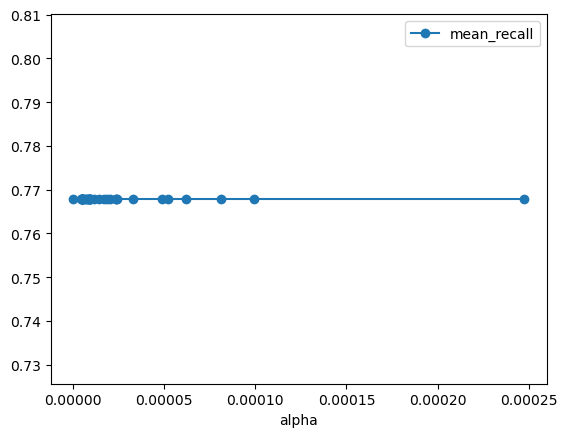

In [100]:
alpha_results.plot(x='alpha',
                   y='mean_recall',
                   marker='o')